In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data #里面有三种不同的分类
y = iris.target
X = X[y < 2, :2] #取前两个特征
y = y[y < 2]

from model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

from LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [2]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

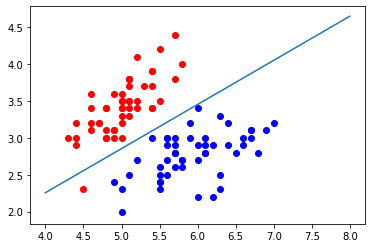

In [3]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()
#决策边界上的点划分到哪边都行，没有很大影响（这种点数量相对来说很少）

为什么有个红色的点划分错误，然后score结果仍然是1.0？因为刚好这个点划分为了训练数据集，所以结果是1.0。
下面描绘训练数据集的图像

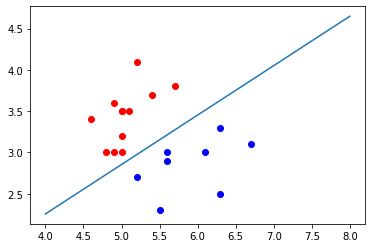

In [4]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


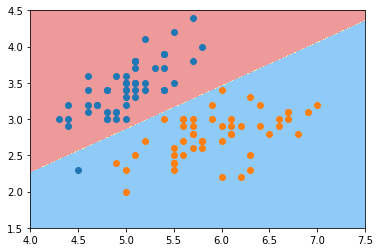

In [6]:
#绘制决策边界
def plot_decision_boundary(model, axis):#axis中有4个元素（其实就是X轴Y轴的范围）
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### KNN的决策边界

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
knn_clf.score(X_test, y_test)

1.0

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


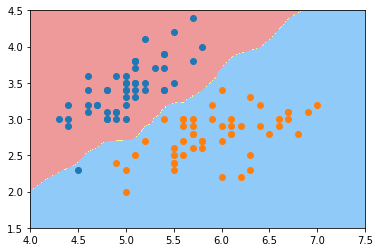

In [9]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


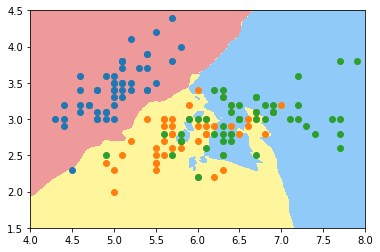

In [11]:
#三个特征时
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(iris.data[:, :2], iris.target)#使用iris全部的数据
plot_decision_boundary(knn_clf2, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1])
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1])
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1])
plt.show()

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


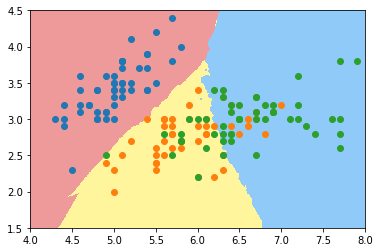

In [12]:
#划分不是特别明显，决策边界不规整，需要调整参数
knn_clf2 = KNeighborsClassifier(n_neighbors=50)
knn_clf2.fit(iris.data[:, :2], iris.target)#使用iris全部的数据
plot_decision_boundary(knn_clf2, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1])
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1])
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1])
plt.show()